In [3]:
#Problem 1: Obtaining a dataset
import pandas as pd 
df =pd.read_csv('train.csv', encoding="shift-jis")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Problem 2: Investigating the dataset itself

This dataset from Kaggle contains detailed information about residential homes in Ames, Iowa and goal here is to predict the house sale price (SalePrice), making it a regression problem.

It includes:

Property info: Lot size, zoning, road type, utilities, and shape.

Location: Neighborhood and proximity to roads or railways.

Building details: Type, style, construction year, materials.

Basement and interior: Square footage, quality, rooms, bathrooms, kitchens.

Garage: Type, size, condition.

Outdoor features: Porches, decks, pools, fences.

Sale details: Month, year, type, and condition of sale.

The dataset mixes numerical and categorical data and is widely used for housing price prediction models.


##[Problem 3] Checking the data
Let's check the data. Please report using a combination of code and markdown.
- See what each feature is about :I will use 'df.dtypes()'
- Check which column is the target variable this time.: Here i will use 'df.nunique()' 
- Display the mean, standard deviation, and quartiles of the feature values at once. : Here I will use 'df.mean' , 'df.std' and 'df.quantile([])'

In [4]:
print(df.dtypes)
print(df.nunique())
numeric_df = df.select_dtypes(include=['number'])
quartiles = numeric_df.quantile([0.25, 0.50, 0.75])
print(f'mean :{df.mean} , std:{df.std} , quartitles:{quartiles} ')

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64
mean :<bound method DataFrame.mean of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   

Axes(0.125,0.11;0.62x0.77)
              Total  missing_ratio
PoolQC         1453       0.995205
MiscFeature    1406       0.963014
Alley          1369       0.937671
Fence          1179       0.807534
MasVnrType      872       0.597260
FireplaceQu     690       0.472603
LotFrontage     259       0.177397
GarageType       81       0.055479
GarageYrBlt      81       0.055479
GarageFinish     81       0.055479
GarageQual       81       0.055479
GarageCond       81       0.055479
BsmtExposure     38       0.026027
BsmtFinType2     38       0.026027
BsmtQual         37       0.025342
BsmtCond         37       0.025342
BsmtFinType1     37       0.025342
MasVnrArea        8       0.005479
Electrical        1       0.000685
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1 

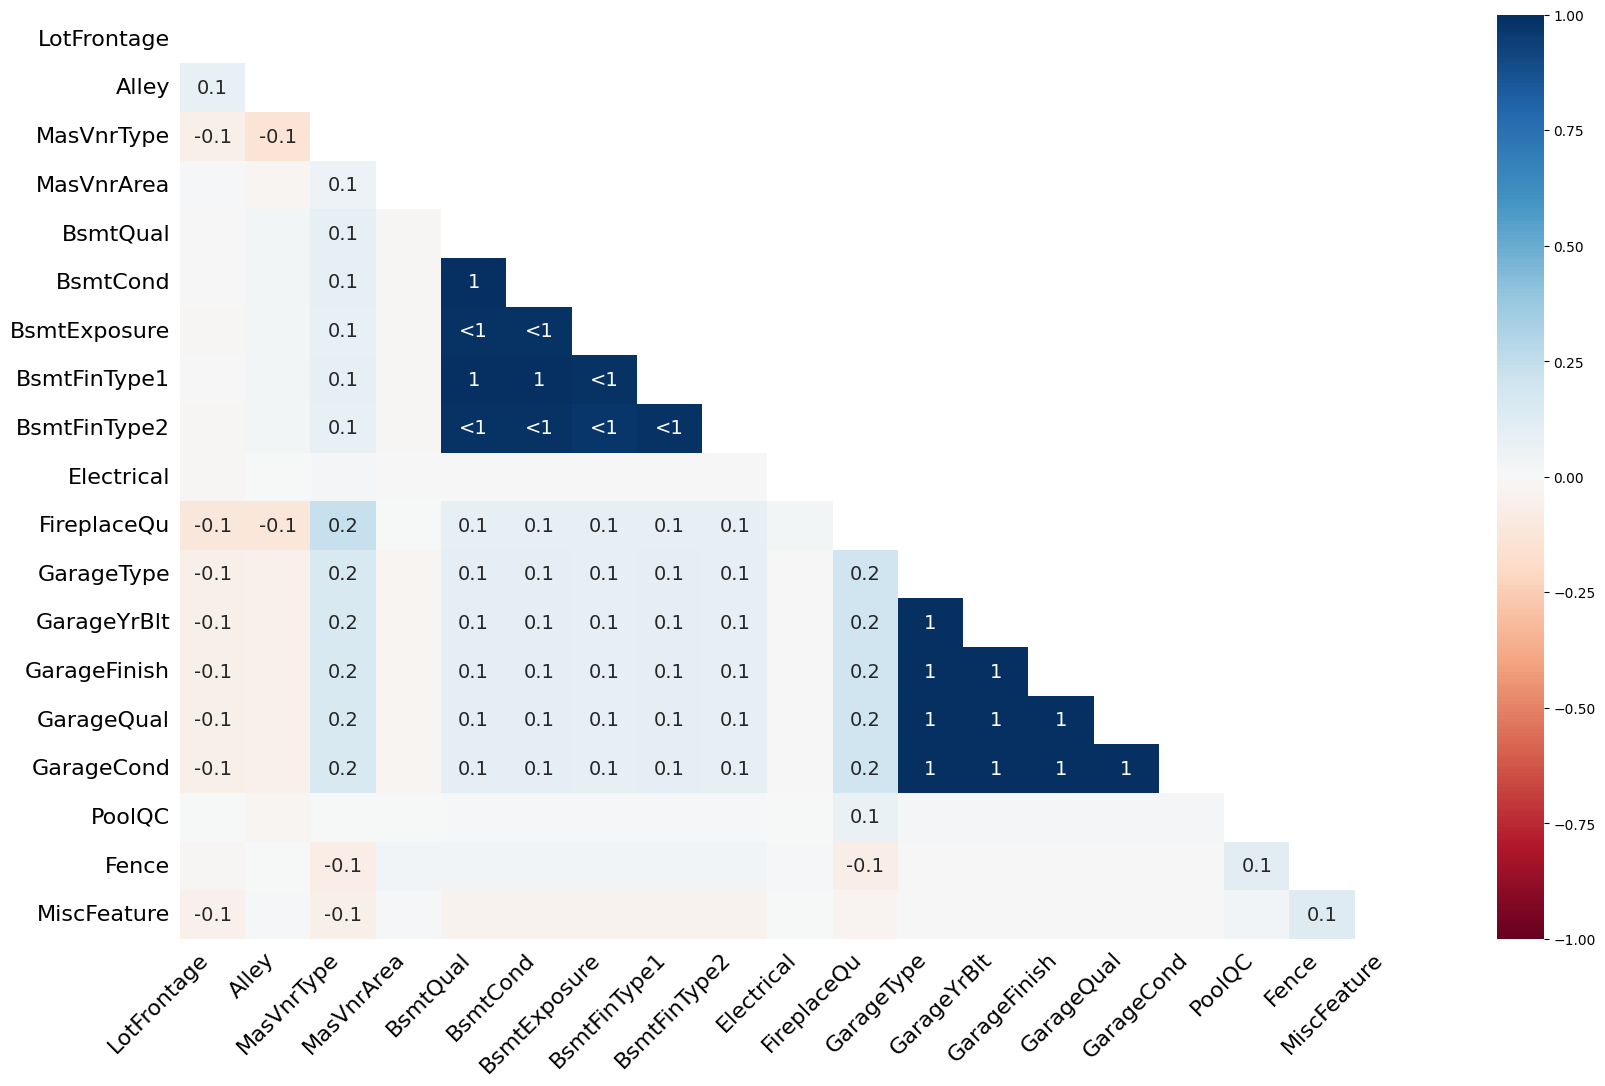

In [16]:
##Problem 4: Dealing with Missing Values
import pandas as pd
import missingno as msg
df=pd.read_csv('train.csv')
print(msg.heatmap(df))
mis_v = df.isnull().sum().to_frame(name='Total')
mis_v['missing_ratio'] = mis_v['Total'] / len(df)
mis_v = mis_v[mis_v['Total'] > 0]
mis_v.sort_values(by='missing_ratio', ascending=False, inplace=True)
print(mis_v)
col_drop=mis_v[mis_v['Total']>=5].index
df_delete=df.drop(columns=col_drop)
df_final = df_delete.dropna()
print(df_final)


[Problem 5] Researching terminology

Kurtosis

Kurtosis is a statistical measure used to describe a characteristic of a dataset ,
is something that can extent to which a distribution contains outliers. It assesses 
the propensity of a distribution to have extreme values within its tails. 
Keys:
- There are three kinds of kurtosis: mesokurtic (normal), platykurtic (less than normal), and leptokurtic (more than normal). Statisticians define these types relative to the normal distribution. Higher kurtosis values indicate that the distribution has more outliers falling relatively far from the mean. Distributions with smaller values have a lower tendency for producing extreme values. When you’re assessing a sample, outliers have the greatest impact on this statistic.
- Kurtosis describes the “fatness” of the tails found in probability distributions.
- Kurtosis risk is a measurement of how often an investment’s price moves dramatically.

Skewness

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical 
when its left and right side are not mirror images.

A distribution can have right (or positive), left (or negative), or zero skewness.
- zero skewness: Data is perfectly symmetrical (like a normal distribution).
- Positive skew (right-skewed): Tail is longer on the right side; mean > median.
- Negative skew (left-skewed): Tail is longer on the left side; mean < median.


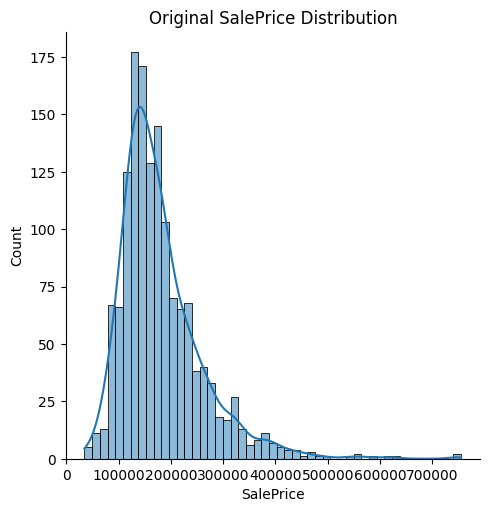

Original Skewness: 1.880940746034036
Original Kurtosis: 6.509812011089439


In [12]:
#[Problem 6] Confirming distribution
import pandas as pd
import seaborn as sns 
from scipy.stats import skew , kurtosis
import matplotlib.pyplot as plt
import numpy as np 

df =pd.read_csv('train.csv', encoding="shift-jis")


sns.displot(df['SalePrice'] ,kde=True)
plt.title('Original SalePrice Distribution')
plt.show()

print("Skewness:", skew(df['SalePrice'], nan_policy='omit'))
print("Kurtosis:", kurtosis(df['SalePrice'], nan_policy='omit'))



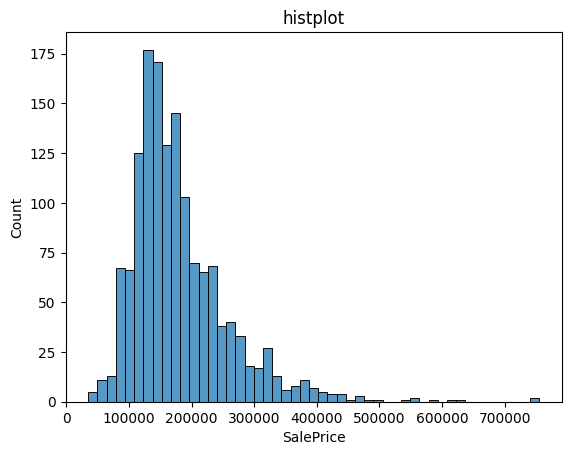

In [13]:
sns.histplot(df['SalePrice'])
plt.title('histplot')
plt.show()

Before transformation the SalePrice is often right-skewed, meaning many 
small values and few very large ones. This causes non-normality.

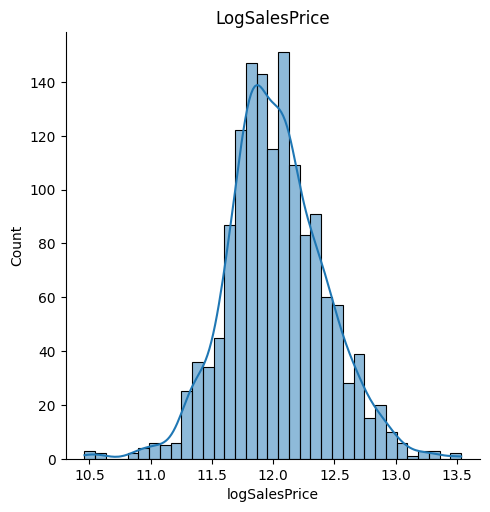

 skew 0.12122191311528363  and Kurtosis: 0.8026427107468055


In [20]:
df['logSalesPrice']=np.log1p(df['SalePrice'])

sns.displot(df['logSalesPrice'], kde=True)
plt.title('LogSalesPrice')
plt.show()

print(' skew',skew(df['logSalesPrice']),' and Kurtosis:',kurtosis(df['logSalesPrice']))

After transformation: Applying np.log1() (log(x+1)) reduces skewness and kurtosis,
making the distribution closer to a normal distribution.

Why this matters:
Many machine learning models perform better when data is normally distributed, 
so this transformation can improve prediction accuracy.

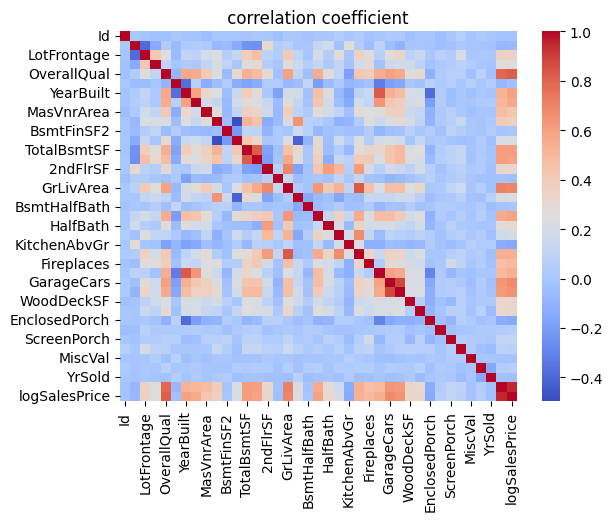

Top 10 Features:
 logSalesPrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Name: SalePrice, dtype: float64


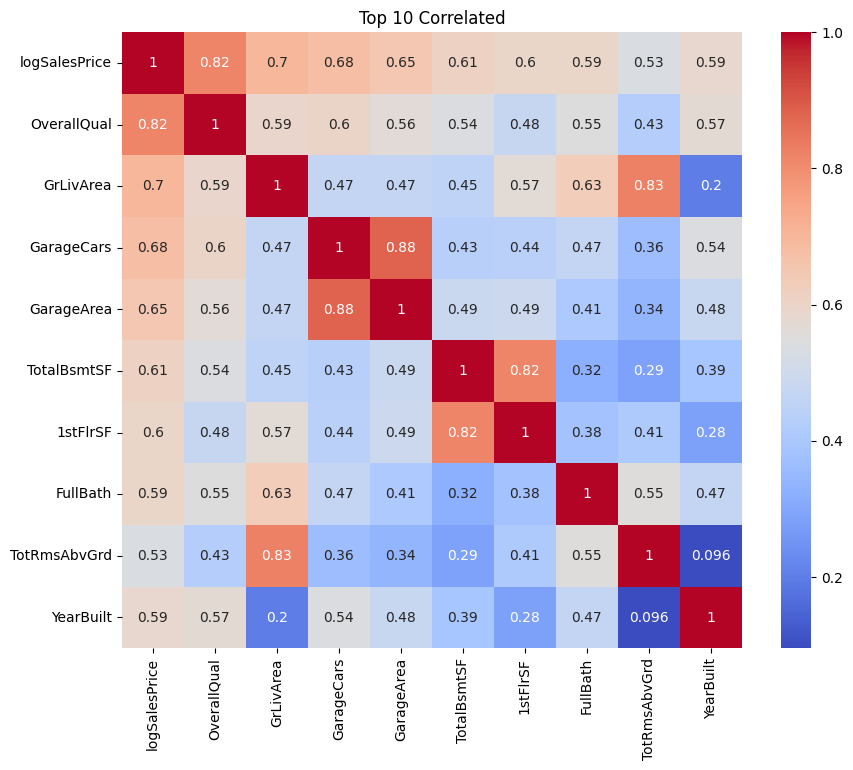

In [25]:
#[Problem 7] Confirming the correlation coefficient

corr_ma=df.corr(numeric_only=True)
sns.heatmap(corr_ma ,cmap='coolwarm', annot=False)
plt.title(' correlation coefficient ')
plt.show()

top_feat = corr_ma['SalePrice'].abs().sort_values(ascending=False)[1:11]  
print("Top 10 Features:\n", top_feat)

selected_corr = df[top_feat.index].corr()
plt.figure(figsize=(10,8))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm')
plt.title('Top 10 Correlated')
plt.show()